<a href="https://colab.research.google.com/github/mcmaharrey/MLA_MCM/blob/main/FinalProject_Classification_MCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Matthew Maharrey <br>
CS430-ON <br>
Final Project Classification**

**Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430_Final_Project/Academic_Success.csv', sep=";")

In [ ]:
df.columns = df.columns.str.replace("\t", "")

In [ ]:
df.columns = ['marital_status', 'app_mode', 'app_order', 'course', 'attendance', 'prev_qual', 'prev_qual_grade', 'nationality', 'mother_qual', 'father_qual', 'mother_occ', 'father_occ', 'admission_grade', 'displaced', 'edu_special', 'debtor', 'fees_uptodate', 'gender', 'scholarship', 'age_at_enroll', 'international', 'CU_1st_sem_cred', 'CU_1st_sem_enroll', 'CU_1st_sem_eval', 'CU_1st_sem_approved', 'CU_1st_sem_grade', 'CU_1st_sem_no_eval', 'CU_2nd_sem_cred', 'CU_2nd_sem_enroll', 'CU_2nd_sem_eval', 'CU_2nd_sem_approved', 'CU_2nd_sem_grade', 'CU_2nd_sem_no_eval', 'unemployment', 'inflation', 'GDP', 'target']

**Statistics and Visual Exploration**

In [ ]:
print(df.head())

   marital_status  app_mode  app_order  course  attendance  prev_qual  \
0               1        17          5     171           1          1   
1               1        15          1    9254           1          1   
2               1         1          5    9070           1          1   
3               1        17          2    9773           1          1   
4               2        39          1    8014           0          1   

   prev_qual_grade  nationality  mother_qual  father_qual  ...  \
0            122.0            1           19           12  ...   
1            160.0            1            1            3  ...   
2            122.0            1           37           37  ...   
3            122.0            1           38           37  ...   
4            100.0            1           37           38  ...   

   CU_2nd_sem_cred  CU_2nd_sem_enroll  CU_2nd_sem_eval  CU_2nd_sem_approved  \
0                0                  0                0                    0   
1     

In [ ]:
numerical_summary = df.describe()
print(numerical_summary)

       marital_status     app_mode    app_order       course   attendance  \
count     4424.000000  4424.000000  4424.000000  4424.000000  4424.000000   
mean         1.178571    18.669078     1.727848  8856.642631     0.890823   
std          0.605747    17.484682     1.313793  2063.566416     0.311897   
min          1.000000     1.000000     0.000000    33.000000     0.000000   
25%          1.000000     1.000000     1.000000  9085.000000     1.000000   
50%          1.000000    17.000000     1.000000  9238.000000     1.000000   
75%          1.000000    39.000000     2.000000  9556.000000     1.000000   
max          6.000000    57.000000     9.000000  9991.000000     1.000000   

         prev_qual  prev_qual_grade  nationality  mother_qual  father_qual  \
count  4424.000000      4424.000000  4424.000000  4424.000000  4424.000000   
mean      4.577758       132.613314     1.873192    19.561935    22.275316   
std      10.216592        13.188332     6.914514    15.603186    15.3431

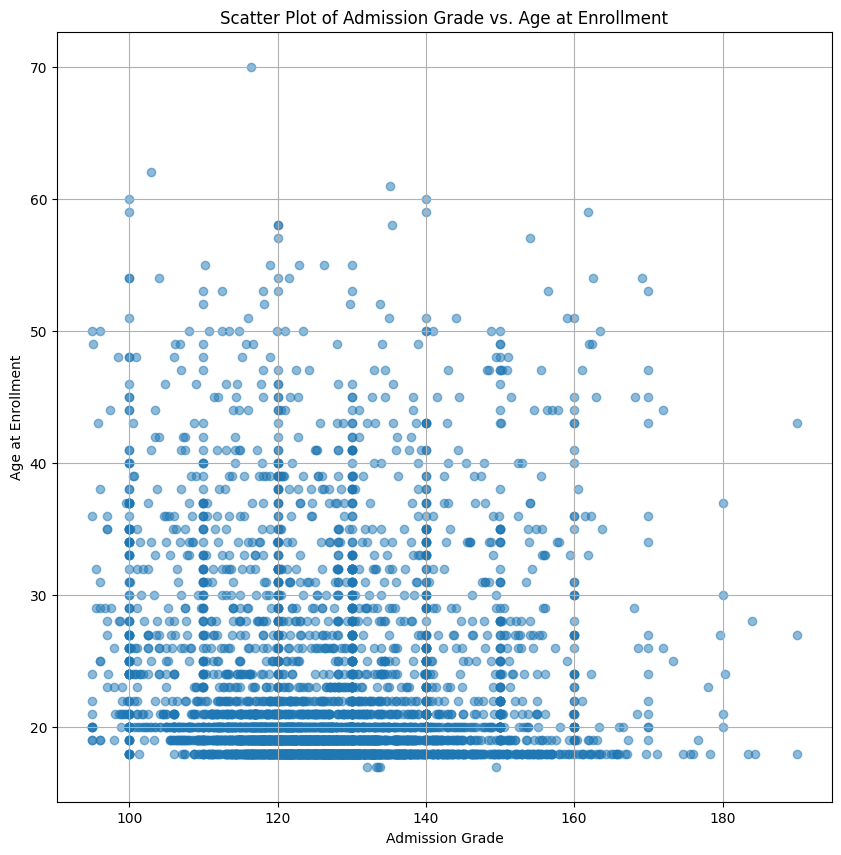

In [ ]:
x_column = 'admission_grade'
y_column = 'age_at_enroll'

plt.figure(figsize=(10, 10))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title("Scatter Plot of Admission Grade vs. Age at Enrollment")
plt.xlabel("Admission Grade")
plt.ylabel("Age at Enrollment")
plt.grid(True)
plt.show()

**Splitting Data into Train/Test**

In [ ]:
X = df.drop(columns=["target"])
y = df[['target']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3539, 36)
X_test shape: (885, 36)
y_train shape: (3539, 1)
y_test shape: (885, 1)


**Building the Pipeline & Executing**

In [ ]:
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

In [ ]:
logistic_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [ ]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestClassifier())
])

In [ ]:
rf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest', RandomForestClassifier())])

In [ ]:
print("Train Accuracy:", logistic_pipeline.score(X_train, y_train))
print("Test Accuracy:", logistic_pipeline.score(X_test, y_test))


Train Accuracy: 0.7787510596213619
Test Accuracy: 0.752542372881356


In [ ]:
logistic_predictions = logistic_pipeline.predict(X_test)

In [ ]:
rf_predictions = rf_pipeline.predict(X_test)

In [ ]:
logistic_precision = precision_score(y_test, logistic_predictions, average=None)
logistic_recall = recall_score(y_test, logistic_predictions, average=None)
logistic_f1 = f1_score(y_test, logistic_predictions, average=None)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)

In [ ]:
rf_precision = precision_score(y_test, rf_predictions, average=None)
rf_recall = recall_score(y_test, rf_predictions, average=None)
rf_f1 = f1_score(y_test, rf_predictions, average=None)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

In [ ]:
print("Logistic Regression Model:")
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)
print("Accuracy:", logistic_accuracy)
print("Confusion Matrix:")
print(logistic_conf_matrix)

Logistic Regression Model:
Precision: [0.83276451 0.4516129  0.76152305]
Recall: [0.7721519  0.2781457  0.90909091]
F1 Score: [0.80131363 0.3442623  0.82878953]
Accuracy: 0.752542372881356
Confusion Matrix:
[[244  27  45]
 [ 35  42  74]
 [ 14  24 380]]


In [ ]:
print("\nRandom Forest Classifier:")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:")
print(rf_conf_matrix)


Random Forest Classifier:
Precision: [0.84397163 0.5        0.77644711]
Recall: [0.75316456 0.33774834 0.93062201]
F1 Score: [0.79598662 0.40316206 0.84657236]
Accuracy: 0.7661016949152543
Confusion Matrix:
[[238  30  48]
 [ 36  51  64]
 [  8  21 389]]


**Evaluation**

For the Logistic Regression model the overall accuracy was 75%. This means that the model correctly predicted the target 75% of the time. The best preformance for this model was the first class because thats where we saw the highest precision, recall, and f1 score. The second class had the lowest scores out of all three and the third class had the highest recall showing that it was better at identifying the instances of the class.

The Random Forest showed to have better scores that the logistic regression model when looking at precision, recall, and f1 scores. The second class in this model still had the lowest scores. The random forest classifier had slighlty higher accuracy that the other.

Overall, I feel that the Random Forest was the better preforming model when using this dataset.